In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# matplotlib 한글 설정 (전체 설정은 생략하고 개별적으로 font 적용)
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [2]:
df = pd.read_csv("../data/공급지역분석_조인테이블.csv")

df.head()

,group_board_id,title,content,location,status,deadline,created_at,updated_at,total_users,group_product_id,category_id,user_id,joined_at,role,user_role,category_name
0,1,공구_1,Laboriosam rem placeat error asperiores. Culpa...,수원,마감임박,2025-06-28,2024-12-31,2025-03-26,4,189,23,202.0,2024-12-19,참여자,USER,식용유/참기름
1,1,공구_1,Laboriosam rem placeat error asperiores. Culpa...,수원,마감임박,2025-06-28,2024-12-31,2025-03-26,4,189,23,185.0,2025-03-21,리더,USER,식용유/참기름
2,1,공구_1,Laboriosam rem placeat error asperiores. Culpa...,수원,마감임박,2025-06-28,2024-12-31,2025-03-26,4,189,23,90.0,2025-05-09,참여자,USER,식용유/참기름
3,1,공구_1,Laboriosam rem placeat error asperiores. Culpa...,수원,마감임박,2025-06-28,2024-12-31,2025-03-26,4,189,23,87.0,2025-01-31,참여자,USER,식용유/참기름
4,1,공구_1,Laboriosam rem placeat error asperiores. Culpa...,수원,마감임박,2025-06-28,2024-12-31,2025-03-26,4,189,23,227.0,2025-04-18,참여자,USER,식용유/참기름


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   group_board_id    3001 non-null   int64  
 1   title             3001 non-null   object 
 2   content           3001 non-null   object 
 3   location          3001 non-null   object 
 4   status            3001 non-null   object 
 5   deadline          3001 non-null   object 
 6   created_at        3001 non-null   object 
 7   updated_at        3001 non-null   object 
 8   total_users       3001 non-null   int64  
 9   group_product_id  3001 non-null   int64  
 10  category_id       3001 non-null   int64  
 11  user_id           3000 non-null   float64
 12  joined_at         3000 non-null   object 
 13  role              3000 non-null   object 
 14  user_role         3000 non-null   object 
 15  category_name     3001 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory

In [4]:
df['location'].unique()

array(['수원', '대구', '대전', '부산', '울산', '서울', '광주', '인천'], dtype=object)

In [5]:
df['location'].value_counts()

location
대구    439
대전    419
부산    393
인천    393
울산    375
수원    350
광주    342
서울    290
Name: count, dtype: int64

In [6]:
# 날짜 형식 변환
df['created_at'] = pd.to_datetime(df['created_at'])
df['joined_at'] = pd.to_datetime(df['joined_at'])
df['year_month'] = df['created_at'].dt.to_period('M')  # 월 단위 추세용

## 지역별 공구방 수
같은 공구방이 여러 줄로 중복돼 있으므로 → group_board_id 기준 중복 제거 후 집계

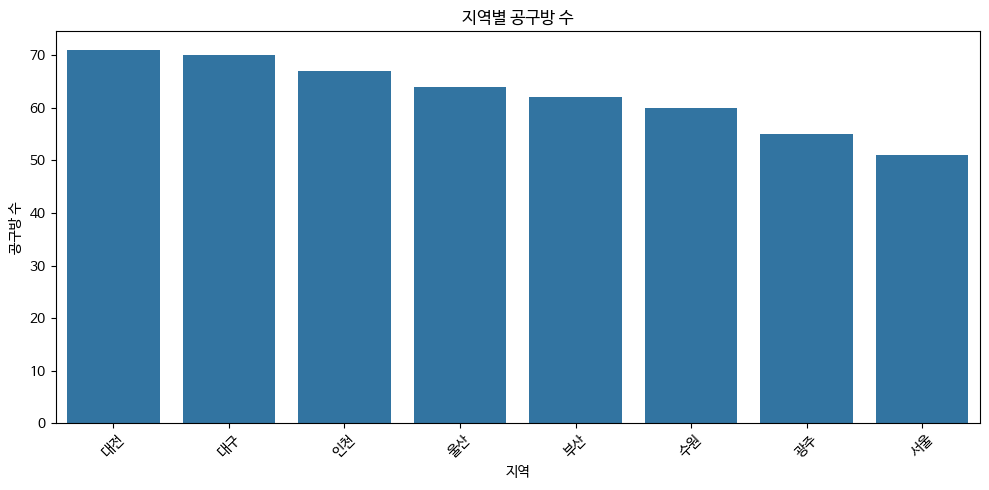

In [7]:
# 공구방 단위로 중복 제거
group_boards = df.drop_duplicates(subset='group_board_id')

# 지역별 공구방 수 집계
region_group_counts = group_boards['location'].value_counts().reset_index()
region_group_counts.columns = ['지역', '공구방 수']

# 시각화
plt.figure(figsize=(10,5))
sns.barplot(data=region_group_counts, x='지역', y='공구방 수')
plt.title('지역별 공구방 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 지역별 총 참여자 수

중복 없이 user_id 기준으로 count (공구방 중복 상관없이 유저만 고려)

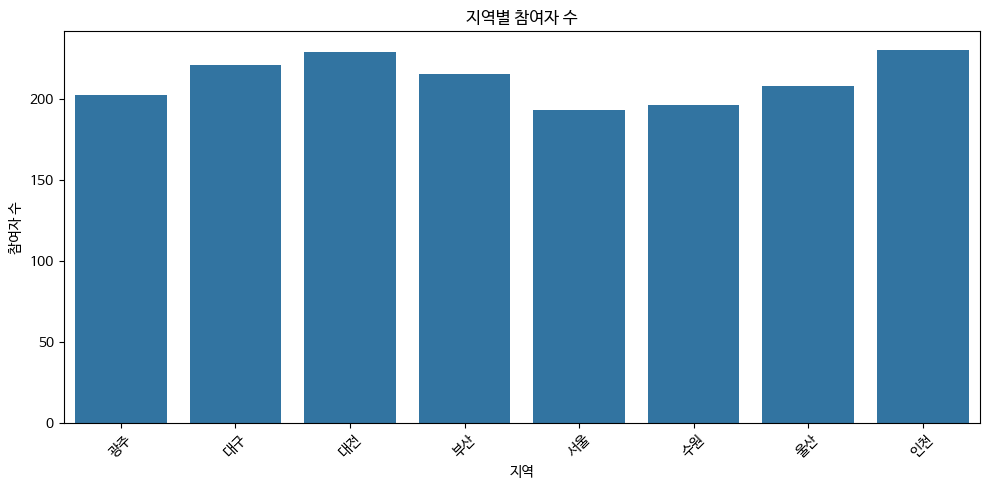

In [8]:
# 참여자 수는 중복 제거 없이 location 기준 count
region_participant_counts = df.groupby('location')['user_id'].nunique().reset_index()
region_participant_counts.columns = ['지역', '참여자 수']

# 시각화
plt.figure(figsize=(10,5))
sns.barplot(data=region_participant_counts, x='지역', y='참여자 수')
plt.title('지역별 참여자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 지역별 리더 수
role == '리더'인 사람만 필터링 → 그 후 location별 count

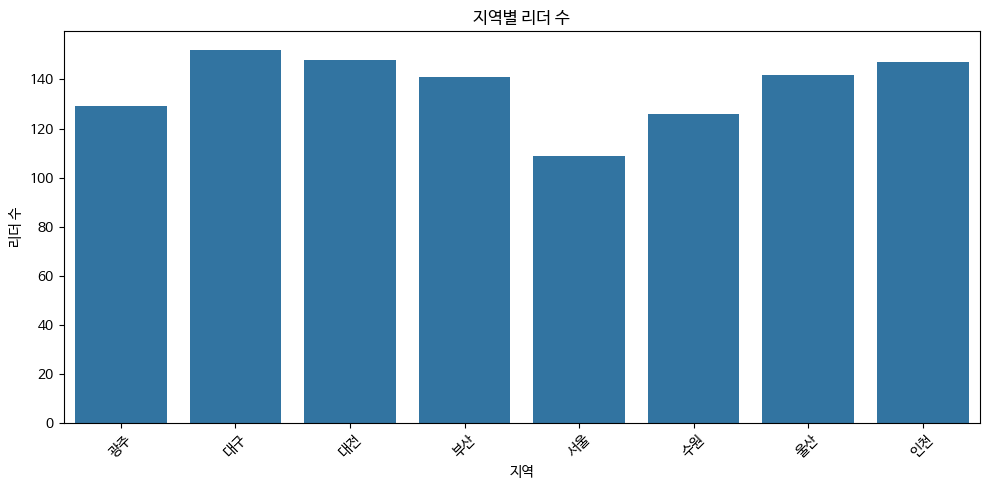

In [9]:
# 리더만 필터링
leaders = df[df['role'] == '리더']

# 지역별 리더 수
region_leader_counts = leaders.groupby('location')['user_id'].nunique().reset_index()
region_leader_counts.columns = ['지역', '리더 수']

# 시각화
plt.figure(figsize=(10,5))
sns.barplot(data=region_leader_counts, x='지역', y='리더 수')
plt.title('지역별 리더 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 월별 공구 증가 추이

group_board_id, created_at 기준 중복 제거 → year_month 생성 후 datetime 변환 → 시계열 기반 월별 공구방 수 시각화

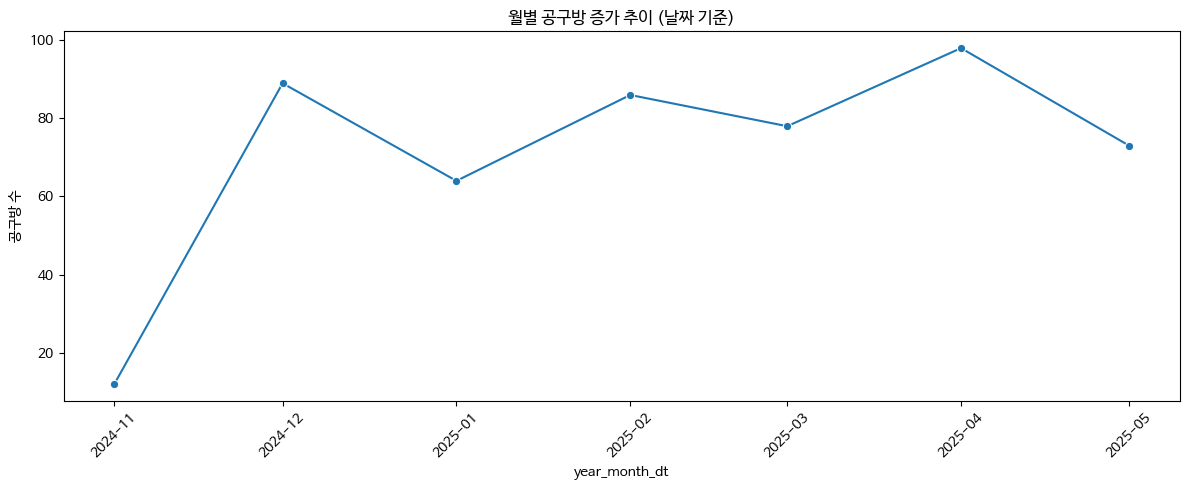

In [10]:
# 중복 제거
unique_boards = df[['group_board_id', 'created_at']].drop_duplicates()

# 날짜 -> 월 단위로 변환
unique_boards['year_month'] = pd.to_datetime(unique_boards['created_at']).dt.to_period('M').astype(str)

# 월별 공구방 수 집계
monthly_trend = unique_boards.groupby('year_month')['group_board_id'].count().reset_index()
monthly_trend.rename(columns={'group_board_id': '공구방 수'}, inplace=True)

# 날짜 형식으로 변환
monthly_trend['year_month_dt'] = pd.to_datetime(monthly_trend['year_month'].astype(str))

# 시각화
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_trend, x='year_month_dt', y='공구방 수', marker='o')
plt.title('월별 공구방 증가 추이 (날짜 기준)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 지역별 인기 카테고리

group_board_id 단위로 중복 제거 후 → location, category_name 교차 count

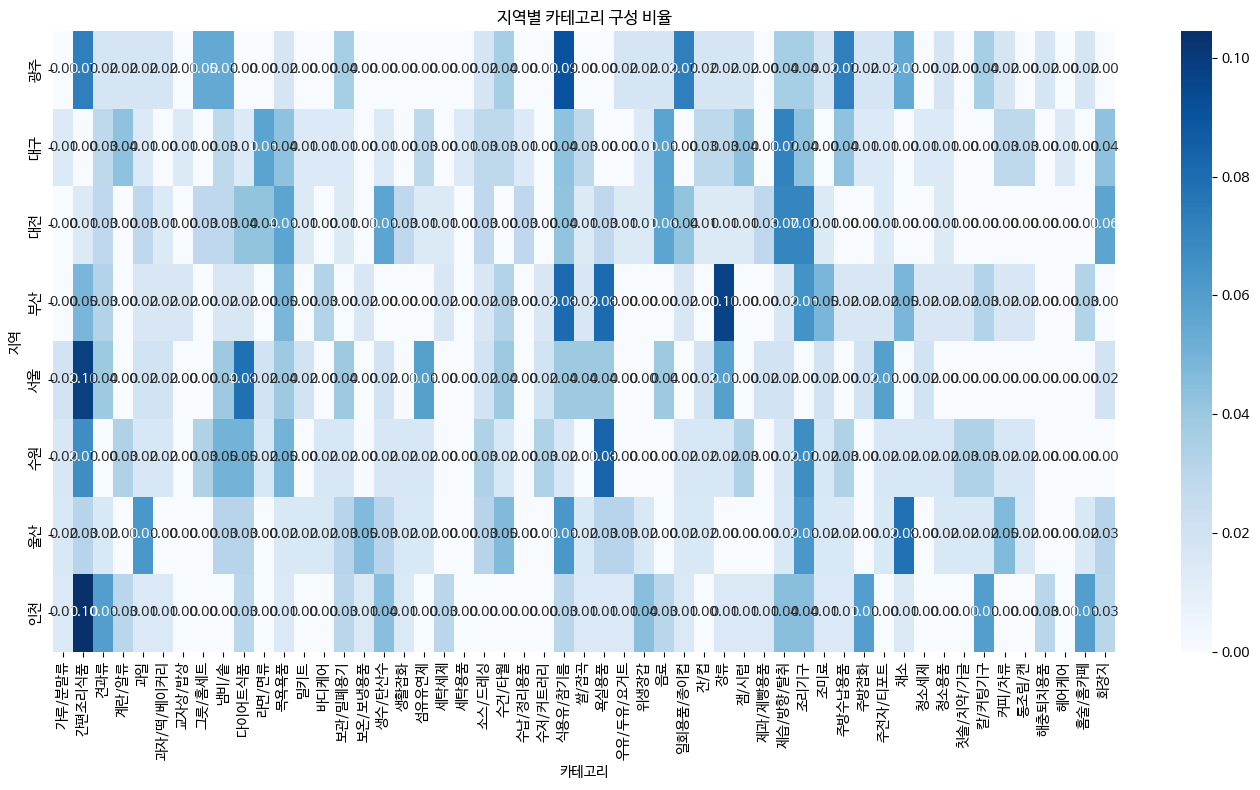

In [11]:
# 공구방 단위로 중복 제거
dedup = df.drop_duplicates(subset='group_board_id')

# 피벗테이블 생성
category_by_region = pd.pivot_table(dedup, index='location', columns='category_name',
                                     aggfunc='size', fill_value=0)

# 비율로 보기
category_percent = category_by_region.div(category_by_region.sum(axis=1), axis=0)

# 히트맵 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(category_percent, cmap='Blues', annot=True, fmt=".2f")
plt.title('지역별 카테고리 구성 비율')
plt.ylabel('지역')
plt.xlabel('카테고리')
plt.tight_layout()
plt.show()

- 고활성 지역: 추천 공구 상단 노출 / 마케팅 우선 지역
- 저활성 지역: 리더 유입 이벤트 기획
- 성장 중인 지역: 빠른 공략으로 시장 선점 가능
- 참여 감소 지역: 리더 이탈 or 제품 문제 여부 점검 필요

이런 인사이츠를 얻을 수 있는데 차피 더미데이터라 시각화자료의 세세한 분석까지 하지는 않았음 이런 코드의 프로세스로 가기